# Machine Learning for Social Sciences: Midterm Exam

**Name:** Shreyans Kothari |
**Uni:** sk4819 |
**Date:** October 28th, 2021 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("/Users/shreyanskothari/Desktop/Machine Learning for Social Sciences/Midterm")

### 1) Importing spam dataset and reading first six rows

In [3]:
spam = pd.read_csv("spam_dataset.csv")
spam.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
spam.tail(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
4595,0.00,0.0,1.19,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,24,0
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
spam.shape

(4601, 58)

**'george' and the area code '650' are indicators of 
	non-spam. 
    
    Number of Instances: 4601 (1813 Spam = 39.4%)
    
    Number of Attributes: 58 (57 continuous, 1 nominal class label)

### 2) Which three variables in the dataset will be important predictors in a model of spam? Why?

Exploring the variables:
- word_freq_WORD = percentage of words in the e-mail that match WORD
    - 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail
- char_freq_CHAR = percentage of characters in the e-mail that match CHAR
- capital_run_length_average = average length of uninterrupted sequences of capital letters
- capital_run_length_longest = length of longest uninterrupted sequence of capital letters
- capital_run_length_total = sum of length of uninterrupted sequences of capital letters 
    - = total number of capital letters in the e-mail
- spam = denotes whether the e-mail was considered spam (1) or not (0)

In [6]:
spam.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

The three most important variables for predicting spam will be char_freq_$:, word_freq_meeting:, and capital_run_length_average:. 

- char_freq_$: This variable measures the percentage of characters in the e-mail that match the dollar sign. Most of the spam emails (especially the ones asking for money) would list a dollar amount: the amount of money the spammers ask for (for example: if it is some form of phishing) or the amount of money the spam sender would want to "send to us" if we "click on the included link." The dollar sign could also be a common character in corporate marketing emails- emails about changes in price of goods or about some marketing campaign.
- word_freq_meeting: This variable measures the percentage of words in the e-mail that match the word 'meeting'. I don't expect a lot of spam emails to use the word 'meetings'; the "spam concept [in this email databse] is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography..." but spam emails don't generally tend to ask for / want to schedule meetings of any kind. Phishing email would focus on getting money in some form or another, and most other types of spam would want the user to access their website. The emails that do mention the word 'meeting' are very likely emails that the user recieved to schedule meetings with colleagues, friends, and family. 
- capital_run_length_average: this variable measures the average length of uninterrupted sequence of capital letters. In a non-spam email, you would not expect a lot of letters in capital simultaneously in a sentence. Emails tend to be a more formal mode of communication, especially in comparision to texts. I would expect a lot of words in all-caps if we were analyzing a phone text corpus. However, capital letters seem very uncharacteristic of a non-spam email. 
---
***Note: word_freq_george would be a great indicator for the spam filter. However, it could lead to overfitting (and would most likely not be able to accurately predict data on unseen data) since these emails come from "filed work and personal e-mails" from the creator and donor: George Forman.*** 

### 3) Visualize the univariate distribution of each of the variables in the previous question.

In [7]:
%matplotlib inline

Text(0, 0.5, 'Average Length of Capital Letters')

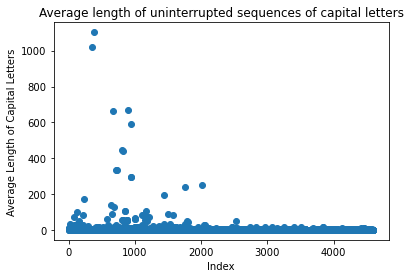

In [8]:
#Visualizing the distribution of capital_run_length_average:
plt.scatter(spam.index, spam['capital_run_length_average:'])
plt.title("Average length of uninterrupted sequences of capital letters")
plt.xlabel("Index")
plt.ylabel("Average Length of Capital Letters")

Text(0, 0.5, 'Average Length of Capital Letters')

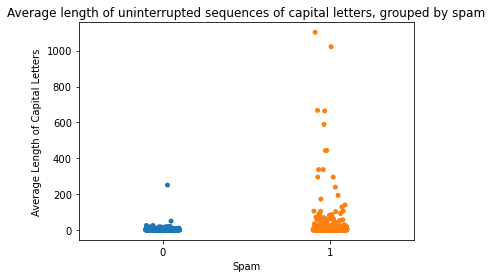

In [9]:
#Visualizing the distribution of capital_run_length_average, grouped by spam and not-spam
sns.stripplot(x = spam['spam'], y = spam['capital_run_length_average:'])
plt.title("Average length of uninterrupted sequences of capital letters, grouped by spam")
plt.xlabel("Spam")
plt.ylabel("Average Length of Capital Letters")

Text(0, 0.5, 'Percentage of words')

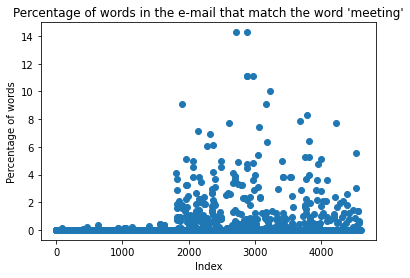

In [10]:
#Visualizing the distribution of word_freq_meeting
plt.scatter(spam.index, spam['word_freq_meeting:'])
plt.title("Percentage of words in the e-mail that match the word 'meeting'")
plt.xlabel("Index")
plt.ylabel("Percentage of words")

Text(0, 0.5, 'Percentage of words')

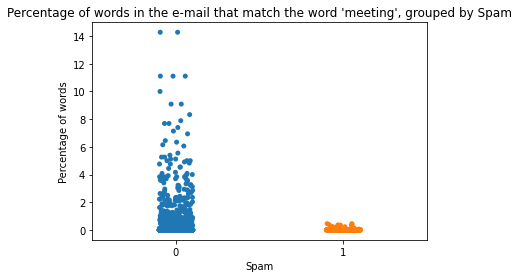

In [11]:
#Visualizing the distribution of word_freq_meeting, grouped by spam and not-spam
sns.stripplot(x = spam['spam'], y = spam['word_freq_meeting:'])
plt.title("Percentage of words in the e-mail that match the word 'meeting', grouped by Spam")
plt.xlabel("Spam")
plt.ylabel("Percentage of words")

Text(0, 0.5, 'Percentage of characters')

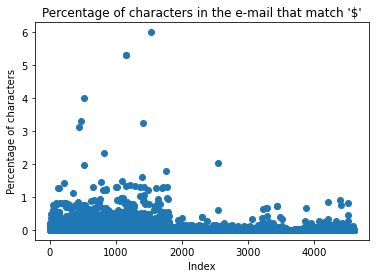

In [12]:
#Visualizing the distribution of char_freq_$:
plt.scatter(spam.index, spam['char_freq_$:'])
plt.title("Percentage of characters in the e-mail that match '$'")
plt.xlabel("Index")
plt.ylabel("Percentage of characters")

Text(0, 0.5, 'Percentage of characters')

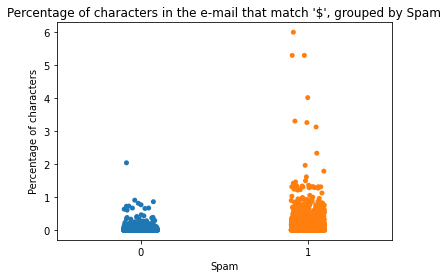

In [13]:
#Visualizing the distribution of char_freq_$:, grouped by spam and not-spam
sns.stripplot(x = spam['spam'], y = spam['char_freq_$:'])
plt.title("Percentage of characters in the e-mail that match '$', grouped by Spam")
plt.xlabel("Spam")
plt.ylabel("Percentage of characters")

### 4) Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam"

To predict targets like spam, we need the model to be able to conduct classification. So far, we have learned the following classification models:
- knn
- Logistic Regression (unpenalized)
- Penalized Logistic Regression
- Support Vector Machines
- Decision Trees
- Bagged Trees
- Random Forests

### 5) Describe the importance of training and test data. Why do we seperate data into these subsets?

In Machine Learning, we split the data between a training set and test set. The models for regression or classification of the target is done using the features in the training set. The objective behind creation of models is not just to perform well on the training set, but to perform well on all unseen data. This is where the test set comes in- these are observations that are set aside before the machine learning model is trained. Once the model is created, we run it on the this test set to assess the model's true accuracy. If we don't set aside a test-set before creating and running a model, we could easily fall in the trap of overfitting where the model would give a very high prediction score on our dataset but would perform poorly on any unseen data. The model would remember the data it is trained on, and thus it would always give the right prediction; just because it performs extremely well on this set would give us no information on whether it would "generalize" well on new data. 

### 6) What is k-fold cross validation and what do we use it for?

Cross validation is a method used to assess the accuracy of the prediction model and to generalize the model accuracy on a given data set. Cross validation is deemed to be a more "stable" form of testing the accuracy of the model than the traditional train-test-set split method. There's always a chance that the high (or low) training and test-score we receive from splitting the data into just a train and test-set is due to chance; cross-validation allows us to minimize these uncertainties. 


In k-fold cross validation, the data is first split into k number of equal folds (or parts). The model is then run k number of times; each time a new fold is used as a test set and the rest of the folds are used as the training set to train the model. For example, in the case of a 6-fold cross validation, the data would be split into 6 equal folds and each of the 6 folds will be set aside once as the test set while all other folds are used for training the model. If we use the 1st fold as a test-set, then folds 2-5 will be used to train the model and the accuracy score will be calculated for that model. The next time, a new model will be trained using the folds 1, 3, 4 and 5, and the 2nd fold will be used as the test-set. An accuracy score is computed for each of these k models and then averaged to get the k-fold cross validation score. 

### 7) How is k-fold cross validation different from stratified k-fold cross-valdiation?

The biggest difference between k-fold cross validation and stratified cross-validation is in how the data is split for the two evaluation methods. Under k-fold cross validation, the data is split into k equal folds, irrespective of the order of the data in the dataset. If the data is organized in a way where (like in the case of the spam dataset) all of the features that correspond to 1 (or the first class) are located at the top of the dataset and all the features that are associated with 0 (or the second class) are located at the tail of the dataset then running a k-fold cross-validation would give us an extremely poor accuracy score.   

In stratified k-fold cross validation, the data is split between the different folds on the basis of the proportion of distribution of the classes in the entire dataset. For example, if in the entire dataset 40% of the observations correspond to the first class, then 40% of the observations in each fold would also correspond to the first class. 

Stratified k-fold cross validation tends to give more reliable estimates of the generalization performance of the model. 

### 8) Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. 

In [14]:
from sklearn.model_selection import train_test_split
y = spam["spam"]
X = spam[["capital_run_length_average:", "word_freq_meeting:", "char_freq_$:"]]
print(spam.shape)
print(X.shape)
print(y.shape)

(4601, 58)
(4601, 3)
(4601,)


In [15]:
X.head(6)

,capital_run_length_average:,word_freq_meeting:,char_freq_$:
0,3.756,0.0,0.000
1,5.114,0.0,0.180
2,9.821,0.0,0.184
3,3.537,0.0,0.000
4,3.537,0.0,0.000
5,3.000,0.0,0.000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3450, 3)
(1151, 3)
(3450,)
(1151,)


KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#running GridSearchCV to get best parameter (k) for model
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid)
grid_knn.fit(X_train, y_train)
print("Best mean cross-validation score: {}".format(grid_knn.best_score_))
print("Best parameter: {}\n".format(grid_knn.best_params_))

#Running model with 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print("Test-set Score: {}".format(knn.score(X_test, y_test)))
print("Cross Validation Score on Training-set:{}".format(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=8), X_train, y_train))))

Best mean cross-validation score: 0.8165217391304347
Best parameter: {'n_neighbors': 8}

Test-set Score: 0.8184187662901824
Cross Validation Score on Training-set:0.8165217391304347


In [18]:
#Scaling values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
print("Test-set Score (Scaled): {}".format(knn.score(X_test_scaled, y_test)))
print("Cross Validation Score on (Scaled) Training-set:{}".format(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=8), X_train_scaled, y_train))))

Test-set Score (Scaled): 0.8192875760208514
Cross Validation Score on (Scaled) Training-set:0.8179710144927537


**Conclusion**: I chose to run a knn classifier model for classification of spam using three variables: "capital_run_length_average:", "word_freq_meeting:", "char_freq_$:" from the spam dataset. I ran GridSearchCV to get the best parameter for the model that would give the highest accuracy: 8 neighbors. Setting the parameter to 8 neighbors, I ran the knn model to get the test score and the cross-validation (on training set) score. Then, I scaled the values using StandardScaler and ran the knn model again using 8 neighbors.

The scaled knn model with 8 neighbors had better test score and cross validation score than the unscaled knn model with 8 neighbors.  

### 9) Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

Unpenalized Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 100000,penalty= 'none')
logreg.fit(X_train, y_train)
print("Test-set Score: {}".format(logreg.score(X_test, y_test)))
print("Cross Validation Score on Training-set: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter= 100000, penalty = 'none'), X_train, y_train))))
print("Logistic Regression Coefficients: {}".format(logreg.coef_))

Test-set Score: 0.8001737619461338
Cross Validation Score on Training-set: 0.8092753623188406
Logistic Regression Coefficients: [[ 0.19936313 -4.22726542 13.35078286]]


**Conclusion:** For the second model, I chose to run an unpenalized logistic regression model. I didn't have to choose any parameters for this model since it is an unpenalized logistic regression model. I ran the model on the same three variables I chose for the first model. This model predicted data worse than the last model (almost 2% less prediction accuracy on the test set compared to knn model with 8 neighbors).

### 10) Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

Penalized Logistic Regression

In [20]:
#Running GridSearchCV to get the best model parameter using scaled values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_plogreg = GridSearchCV(LogisticRegression(penalty ='l2', max_iter = 10000), param_grid)
grid_plogreg.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(grid_plogreg.best_score_))
print("Best parameter: {}\n".format(grid_plogreg.best_params_))

Best mean cross-validation score: 0.8095652173913044
Best parameter: {'C': 100}



In [21]:
#Running GridSearchCV to get the best model parameter using unscaled values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_plogreg = GridSearchCV(LogisticRegression(penalty ='l2', max_iter = 10000), param_grid)
grid_plogreg.fit(X_train, y_train)
print("Best mean cross-validation score: {}".format(grid_plogreg.best_score_))
print("Best parameter: {}\n".format(grid_plogreg.best_params_))

Best mean cross-validation score: 0.8092753623188406
Best parameter: {'C': 1000}



**GridSearchCV gives a slightly better mean gridsearch cross validation score with scaled values of x and y. Thus, we choose our parameter C = 100.**

In [22]:
#Running an (l2) penalized logistic regression with parameter C = 100 using scaled values
plogreg = LogisticRegression(C = 100, max_iter= 10000, penalty = 'l2')
plogreg.fit(X_train_scaled, y_train)
print("(Scaled) Test-set Score: {}".format(plogreg.score(X_test_scaled, y_test)))
print("Cross Validation Score on (Scaled) Training-set: {}".format(np.mean(cross_val_score(LogisticRegression(C = 100, max_iter= 10000, penalty = 'l2'), X_train_scaled, y_train))))
print("L2 Penalized Logistic Regression Coefficients (Scaled): {}".format(plogreg.coef_))

(Scaled) Test-set Score: 0.7993049522154648
Cross Validation Score on (Scaled) Training-set: 0.8095652173913044
L2 Penalized Logistic Regression Coefficients (Scaled): [[ 5.52604133 -3.39040846  3.4231632 ]]


In [23]:
#Running an (l2) penalized logistic regression with parameter C = 100 using unscaled values
plogreg.fit(X_train, y_train)
print("Test-set Score: {}".format(plogreg.score(X_test, y_test)))
print("Cross Validation Score on Training-set: {}".format(np.mean(cross_val_score(LogisticRegression(C = 100, max_iter= 10000, penalty = 'l2'), X_train, y_train))))
print("L2 Penalized Logistic Regression Coefficients: {}".format(plogreg.coef_))

Test-set Score: 0.8010425716768028
Cross Validation Score on Training-set: 0.8089855072463769
L2 Penalized Logistic Regression Coefficients: [[ 0.19958669 -4.18683236 13.27699574]]


**Conclusion:** For the third model, I ran a penalized logistic regression with l2 penalty. I ran gridsearchCV twice: once with scaled values and once with unscaled values to get the best parameter C. The scaled mean gridsearch cross validation had a slightly better score so I chose to use the parameter chosen by that model: C = 100.

I then ran the l2 penalized model twice with C = 100: once with scaled values and once with unscaled values. Of the two models, the scaled values model with C = 100 gave a better cross validation score on the training data. However, the unscaled value model with C = 100 gave a slightly better Test-set score. 

The unscaled l2 penalized logistic regression model with C = 100 predicted better on the test set but had a minimally worse cross validation score than the unpenalized logsitic regression model. However, the knn scaled model with 8 neighbors has the highest test score and cross validation score of all three models. 

### 11) Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

Support Vector Machines

In [24]:
#Running GridSearchCV to get best parameters for the SVM model with scaled values
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']}
grid_svc = GridSearchCV(SVC(), param_grid)
grid_svc.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(grid_svc.best_score_))
print("Best parameter: {}\n".format(grid_svc.best_params_))

Best mean cross-validation score: 0.8168115942028986
Best parameter: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}



In [25]:
#Running SVM with C = 1000, gamma = 1, and kernel = rbf
model = SVC(C = 1000, gamma = 1, kernel = 'rbf')
model.fit(X_train_scaled, y_train)
print("Test-set score: {}".format(model.score(X_test_scaled, y_test)))
print("Cross Validation Score on Training-set: {}".format(np.mean(cross_val_score(SVC(C = 1000, gamma = 1, kernel = 'rbf'), X_train_scaled, y_train))))

Test-set score: 0.8088618592528236
Cross Validation Score on Training-set: 0.8168115942028986


***Conclusion:*** I chose to run a Support Vector Classifier (SVM Classifier) model. First, I ran GridSearchCV to get the best parameters (C = 1000, gamma = 1, kernel = rbf). Then I used these parameters to run the Support Vector Classifier using scaled values of the train and test set. 

SVM Test score and cross validation score are a lot higher than both penalized and unpenalized logistic regression model's test scores and cross validation scores. However, the scaled knn model with 8 neighbors still has higher prediction accuracy score on both the test-set and cross validation when compared to the Support Vector Classifier model. 

### 12) Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models? 

Running Knn with three additional variables: word_freq_conference:, word_freq_project:, word_freq_money:

I added these three variables because I think they should improve the predicive power and accuracy of the model. 

In [26]:
#Creating new X with the six variables
X = spam[["capital_run_length_average:", "word_freq_meeting:", "char_freq_$:", "word_freq_conference:", "word_freq_project:", "word_freq_money:"]]
print(spam.shape)
print(X.shape)
print(y.shape)

(4601, 58)
(4601, 6)
(4601,)


In [27]:
X.head()

,capital_run_length_average:,word_freq_meeting:,char_freq_$:,word_freq_conference:,word_freq_project:,word_freq_money:
0,3.756,0.0,0.000,0.0,0.0,0.00
1,5.114,0.0,0.180,0.0,0.0,0.43
2,9.821,0.0,0.184,0.0,0.0,0.06
3,3.537,0.0,0.000,0.0,0.0,0.00
4,3.537,0.0,0.000,0.0,0.0,0.00


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3450, 6)
(1151, 6)
(3450,)
(1151,)


In [29]:
#Scaling valuesusing StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(3450, 6)
(1151, 6)


In [30]:
#Running GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid)
grid_knn.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(grid_knn.best_score_))
print("Best parameter: {}".format(grid_knn.best_params_))

Best mean cross-validation score: 0.8371014492753623
Best parameter: {'n_neighbors': 8}


In [31]:
#Running a knn model with 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
print("Test-set score: {}".format(knn.score(X_test_scaled, y_test)))
print("Cross Validation Score on Training-set: {}".format(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=8), X_train_scaled, y_train))))

Test-set score: 0.8218940052128584
Cross Validation Score on Training-set: 0.8371014492753623


***Conclusion:*** Yes, this model does predict data more acurately than the previous best model. The knn model with just three neighbors had a test score of 0.819 and cross-validation score of 0.818. The new knn model with 6 variables has a test score of 0.823 and a cross-validation score of 0.837. 

### 13) Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?

In [32]:
#Logistic Regression (Unpenalized)
logreg = LogisticRegression(max_iter= 100000, penalty = 'none')
logreg.fit(X_train, y_train)
print("Test-set score: {}".format(logreg.score(X_test, y_test)))
print("Cross-validation score on Training Set: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter= 100000, penalty = 'none'), X_train, y_train))))

Test-set score: 0.8201563857515204
Cross-validation score on Training Set: 0.8257971014492753


In [33]:
#Penalized (L2) Logistic Regression - GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_logreg = GridSearchCV(LogisticRegression(max_iter= 100000, penalty = 'l2'), param_grid)
grid_logreg.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(grid_logreg.best_score_))
print("Best parameter: {}".format(grid_logreg.best_params_))

Best mean cross-validation score: 0.8257971014492753
Best parameter: {'C': 1000}


In [34]:
#Penalized (L2) Logistic Regression with C = 1000
plogreg = LogisticRegression(max_iter= 100000, penalty = 'l2', C = 1000)
plogreg.fit(X_train_scaled, y_train)
print("Test-set score: {}".format(plogreg.score(X_test_scaled, y_test)))
print("Cross-validation score on Training Set: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter= 100000, penalty = 'l2', C = 1000), X_train_scaled, y_train))))

Test-set score: 0.8201563857515204
Cross-validation score on Training Set: 0.8257971014492753


In [35]:
#Support Vector Machine Classifier - GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']}
grid_svc = GridSearchCV(SVC(), param_grid)
grid_svc.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(grid_svc.best_score_))
print("Best parameter: {}\n".format(grid_svc.best_params_))

Best mean cross-validation score: 0.8371014492753623
Best parameter: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}



In [36]:
model = SVC(C = 100, gamma = 0.1, kernel = 'rbf')
model.fit(X_train_scaled, y_train)
print("Test-set score: {}".format(model.score(X_test_scaled, y_test)))
print("Cross-validation score on Training Set: {}".format(np.mean(cross_val_score(SVC(C = 100, gamma = 0.1, kernel = 'rbf'), X_train_scaled, y_train))))

Test-set score: 0.8227628149435273
Cross-validation score on Training Set: 0.8371014492753623


***Conclusion:*** Of all the models, the Support Vector Classifier with C = 100, gamma = 0.1, and kernel = 'rbf' has the highest test-set score and cross-validation score. The knn model with 8 neighbors is the only one that is comparable to the SCV model: however, the knn model's test-set score is slighlty less than the SVM's test-set score. Surprisingly, both of the knn model with 8 neigbbors and the SVC model have the exact same cross-validation set score. 
___
#### Final model: Support Vector Classifier with C = 100, gamma = 0.1, kernel = 'rbf', and scaled values.

### 14) What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

Some common characteristics of Spam emails include:
- Asking for private information (bank account, financial information, etc.) over email
- A bizarre string of numbers in the email address
- A lot of grammatical errors

A variable that is able to capture any of these charcateristics would prove to be very useful in creating a spam detection/classification model. For the first case, a variable that captures the percentage of times 'word_freq_bank:' or 'word_freq_account:'occur in the email could be useful. 

Additionally, most spam emails are sent in bulk and the greetings don't tend to contain the name of the receiver; if a variable can be created that captures if a greeting in a new email contains the reciever's name or not could be a great feature variable for a spam classification model. 

### 15) Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

Models that can have a continuous dependent variable:  
- knn
- linear regression
- ridge
- lasso
- SVM